In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [2]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]

In [58]:
train_csv = pd.read_csv(Data_train,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,homeTeam,awayTeam,score,NbgoalsHalfTime,NbgoalsFullTime,win_cons_home,win_cons_away,lose_cons_home,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,2.0,3.0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154
1,1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,0.0,2.0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054
2,2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1.0,1.0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815
3,3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,1.0,3.0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045
4,4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1.0,2.0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11359,375,2018-05-19,Villarreal,Real Madrid,0.0,2.0,4.0,1,1,0,...,1.370370,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862,6451,15239
11360,376,2018-05-20,Ath Bilbao,Espanol,2.0,1.0,1.0,0,2,1,...,1.306878,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085,4273,5802
11361,377,2018-05-20,Ath Madrid,Eibar,0.0,2.0,4.0,1,2,0,...,1.724868,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212,13709,4725
11362,378,2018-05-20,Barcelona,Sociedad,1.0,0.0,1.0,0,1,1,...,2.920635,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212,14840,4571


In [4]:
train_columns={'win_cons_home':train_csv.win_cons_home,'win_cons_away':train_csv.win_cons_away,'lose_cons_home':train_csv.lose_cons_home,'lose_cons_away':train_csv.lose_cons_away,'puissance_HomeTeam':train_csv.puissance_HomeTeam,'puissance_AwayTeam':train_csv.puissance_AwayTeam}
df = pd.DataFrame(train_columns)
X = df.values
X

array([[    0,     0,     0,     0,  2409,  6154],
       [    0,     0,     0,     0,  4008,  3054],
       [    0,     0,     0,     0,  3029,  4815],
       ...,
       [    1,     2,     0,     0, 13709,  4725],
       [    0,     1,     1,     0, 14840,  4571],
       [    1,     0,     0,     1,  8716,   100]], dtype=int64)

In [5]:
Y = train_csv['score'].values
Y[0]

2.0

In [6]:
x_train, x_validation, y_train, y_validation =train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)
y_train = y_train.astype(int)
y_validation = y_validation.astype(int)

(9091, 6) (9091,)


In [7]:
# for row in y_train:
#      print(row)

In [8]:
x_train

array([[    0,     0,     4,     0,  2000,   100],
       [    2,     0,     0,     1,  2000,  4468],
       [    1,     0,     0,     2,   100,   100],
       ...,
       [    2,     0,     0,     0,  5198, 10169],
       [    0,     2,     1,     0,  5220,  5176],
       [    2,     1,     0,     0,  7447,  4059]], dtype=int64)

In [54]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(6, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [55]:
model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_36 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_37 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_38 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_40 (Dense)             (None, 512)              

In [56]:
save = ModelCheckpoint('model_CNN.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [57]:
history = model.fit(x_train, y_train,validation_data=(x_validation,y_validation),batch_size=50,epochs=500,callbacks = [save])

Train on 9091 samples, validate on 2273 samples
Epoch 1/500
8750/9091 [===========================>..] - ETA: 0s - loss: 7.9121 - accuracy: 0.4410
Epoch 00001: val_accuracy improved from -inf to 0.46282, saving model to model_CNN.h5
9091/9091 [==============================] - 2s 202us/sample - loss: 7.6770 - accuracy: 0.4420 - val_loss: 1.1535 - val_accuracy: 0.4628
Epoch 2/500
8900/9091 [============================>.] - ETA: 0s - loss: 1.1033 - accuracy: 0.4982
Epoch 00002: val_accuracy improved from 0.46282 to 0.51782, saving model to model_CNN.h5
9091/9091 [==============================] - 1s 136us/sample - loss: 1.1027 - accuracy: 0.4981 - val_loss: 1.1234 - val_accuracy: 0.5178
Epoch 3/500
8950/9091 [============================>.] - ETA: 0s - loss: 1.0562 - accuracy: 0.5034
Epoch 00003: val_accuracy did not improve from 0.51782
9091/9091 [==============================] - 1s 128us/sample - loss: 1.0547 - accuracy: 0.5045 - val_loss: 1.0217 - val_accuracy: 0.5134
Epoch 4/500
88

9000/9091 [============================>.] - ETA: 0s - loss: 0.9785 - accuracy: 0.5311
Epoch 00028: val_accuracy did not improve from 0.54070
9091/9091 [==============================] - 1s 129us/sample - loss: 0.9795 - accuracy: 0.5302 - val_loss: 0.9741 - val_accuracy: 0.5354
Epoch 29/500
8650/9091 [===========================>..] - ETA: 0s - loss: 0.9798 - accuracy: 0.5354
Epoch 00029: val_accuracy did not improve from 0.54070
9091/9091 [==============================] - 1s 128us/sample - loss: 0.9785 - accuracy: 0.5360 - val_loss: 0.9757 - val_accuracy: 0.5350
Epoch 30/500
8800/9091 [============================>.] - ETA: 0s - loss: 0.9834 - accuracy: 0.5269
Epoch 00030: val_accuracy did not improve from 0.54070
9091/9091 [==============================] - 1s 128us/sample - loss: 0.9837 - accuracy: 0.5259 - val_loss: 0.9980 - val_accuracy: 0.5156
Epoch 31/500
9050/9091 [============================>.] - ETA: 0s - loss: 0.9817 - accuracy: 0.5319
Epoch 00031: val_accuracy did not imp

8800/9091 [============================>.] - ETA: 0s - loss: 0.9782 - accuracy: 0.5322
Epoch 00056: val_accuracy did not improve from 0.54070
9091/9091 [==============================] - 1s 149us/sample - loss: 0.9776 - accuracy: 0.5333 - val_loss: 0.9762 - val_accuracy: 0.5385
Epoch 57/500
8900/9091 [============================>.] - ETA: 0s - loss: 0.9783 - accuracy: 0.5330
Epoch 00057: val_accuracy did not improve from 0.54070
9091/9091 [==============================] - 1s 126us/sample - loss: 0.9776 - accuracy: 0.5337 - val_loss: 0.9815 - val_accuracy: 0.5367
Epoch 58/500
8700/9091 [===========================>..] - ETA: 0s - loss: 0.9762 - accuracy: 0.5322
Epoch 00058: val_accuracy did not improve from 0.54070
9091/9091 [==============================] - 1s 124us/sample - loss: 0.9761 - accuracy: 0.5332 - val_loss: 0.9750 - val_accuracy: 0.5389
Epoch 59/500
8900/9091 [============================>.] - ETA: 0s - loss: 0.9804 - accuracy: 0.5297
Epoch 00059: val_accuracy did not imp

Epoch 84/500
9050/9091 [============================>.] - ETA: 0s - loss: 0.9738 - accuracy: 0.5310
Epoch 00084: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 138us/sample - loss: 0.9736 - accuracy: 0.5312 - val_loss: 0.9727 - val_accuracy: 0.5372
Epoch 85/500
8700/9091 [===========================>..] - ETA: 0s - loss: 0.9747 - accuracy: 0.5337
Epoch 00085: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 136us/sample - loss: 0.9737 - accuracy: 0.5348 - val_loss: 0.9709 - val_accuracy: 0.5385
Epoch 86/500
8650/9091 [===========================>..] - ETA: 0s - loss: 0.9742 - accuracy: 0.5362
Epoch 00086: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 135us/sample - loss: 0.9735 - accuracy: 0.5357 - val_loss: 0.9715 - val_accuracy: 0.5376
Epoch 87/500
8800/9091 [============================>.] - ETA: 0s - loss: 0.9747 - accuracy: 0.5332
Epoch 00087: val_accurac

8850/9091 [============================>.] - ETA: 0s - loss: 0.9727 - accuracy: 0.5337
Epoch 00112: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 128us/sample - loss: 0.9713 - accuracy: 0.5349 - val_loss: 0.9899 - val_accuracy: 0.5332
Epoch 113/500
8750/9091 [===========================>..] - ETA: 0s - loss: 0.9749 - accuracy: 0.5311
Epoch 00113: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 121us/sample - loss: 0.9741 - accuracy: 0.5324 - val_loss: 0.9762 - val_accuracy: 0.5385
Epoch 114/500
9000/9091 [============================>.] - ETA: 0s - loss: 0.9729 - accuracy: 0.5316
Epoch 00114: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 118us/sample - loss: 0.9726 - accuracy: 0.5318 - val_loss: 0.9811 - val_accuracy: 0.5381
Epoch 115/500
8650/9091 [===========================>..] - ETA: 0s - loss: 0.9681 - accuracy: 0.5345
Epoch 00115: val_accuracy did not 

8700/9091 [===========================>..] - ETA: 0s - loss: 0.9737 - accuracy: 0.5321
Epoch 00140: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 121us/sample - loss: 0.9727 - accuracy: 0.5336 - val_loss: 0.9711 - val_accuracy: 0.5394
Epoch 141/500
8700/9091 [===========================>..] - ETA: 0s - loss: 0.9725 - accuracy: 0.5332
Epoch 00141: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 122us/sample - loss: 0.9708 - accuracy: 0.5337 - val_loss: 0.9790 - val_accuracy: 0.5385
Epoch 142/500
8700/9091 [===========================>..] - ETA: 0s - loss: 0.9727 - accuracy: 0.5334
Epoch 00142: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 124us/sample - loss: 0.9716 - accuracy: 0.5342 - val_loss: 0.9727 - val_accuracy: 0.5385
Epoch 143/500
8850/9091 [============================>.] - ETA: 0s - loss: 0.9720 - accuracy: 0.5313
Epoch 00143: val_accuracy did not 

8750/9091 [===========================>..] - ETA: 0s - loss: 0.9720 - accuracy: 0.5350
Epoch 00168: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 126us/sample - loss: 0.9734 - accuracy: 0.5338 - val_loss: 0.9724 - val_accuracy: 0.5389
Epoch 169/500
8800/9091 [============================>.] - ETA: 0s - loss: 0.9731 - accuracy: 0.5320
Epoch 00169: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 121us/sample - loss: 0.9716 - accuracy: 0.5340 - val_loss: 0.9878 - val_accuracy: 0.5398
Epoch 170/500
8800/9091 [============================>.] - ETA: 0s - loss: 0.9735 - accuracy: 0.5355
Epoch 00170: val_accuracy did not improve from 0.54114
9091/9091 [==============================] - 1s 119us/sample - loss: 0.9737 - accuracy: 0.5342 - val_loss: 0.9730 - val_accuracy: 0.5328
Epoch 171/500
8750/9091 [===========================>..] - ETA: 0s - loss: 0.9708 - accuracy: 0.5321
Epoch 00171: val_accuracy did not 

Epoch 196/500
8600/9091 [===========================>..] - ETA: 0s - loss: 0.9798 - accuracy: 0.5329
Epoch 00196: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 118us/sample - loss: 0.9815 - accuracy: 0.5309 - val_loss: 1.0354 - val_accuracy: 0.5389
Epoch 197/500
8700/9091 [===========================>..] - ETA: 0s - loss: 0.9780 - accuracy: 0.5292
Epoch 00197: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 122us/sample - loss: 0.9777 - accuracy: 0.5298 - val_loss: 0.9750 - val_accuracy: 0.5398
Epoch 198/500
8850/9091 [============================>.] - ETA: 0s - loss: 0.9734 - accuracy: 0.5324
Epoch 00198: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 124us/sample - loss: 0.9730 - accuracy: 0.5335 - val_loss: 0.9762 - val_accuracy: 0.5389
Epoch 199/500
8950/9091 [============================>.] - ETA: 0s - loss: 0.9743 - accuracy: 0.5334
Epoch 00199: val_acc

Epoch 224/500
8700/9091 [===========================>..] - ETA: 0s - loss: 0.9724 - accuracy: 0.5295
Epoch 00224: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 135us/sample - loss: 0.9721 - accuracy: 0.5312 - val_loss: 0.9737 - val_accuracy: 0.5403
Epoch 225/500
8750/9091 [===========================>..] - ETA: 0s - loss: 0.9719 - accuracy: 0.5339
Epoch 00225: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 157us/sample - loss: 0.9722 - accuracy: 0.5334 - val_loss: 0.9750 - val_accuracy: 0.5389
Epoch 226/500
8700/9091 [===========================>..] - ETA: 0s - loss: 0.9714 - accuracy: 0.5332
Epoch 00226: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 129us/sample - loss: 0.9707 - accuracy: 0.5340 - val_loss: 0.9774 - val_accuracy: 0.5385
Epoch 227/500
8650/9091 [===========================>..] - ETA: 0s - loss: 0.9711 - accuracy: 0.5335
Epoch 00227: val_acc

Epoch 252/500
8850/9091 [============================>.] - ETA: 0s - loss: 0.9734 - accuracy: 0.5307
Epoch 00252: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 148us/sample - loss: 0.9714 - accuracy: 0.5325 - val_loss: 0.9749 - val_accuracy: 0.5376
Epoch 253/500
8650/9091 [===========================>..] - ETA: 0s - loss: 0.9713 - accuracy: 0.5325
Epoch 00253: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 142us/sample - loss: 0.9704 - accuracy: 0.5331 - val_loss: 0.9794 - val_accuracy: 0.5398
Epoch 254/500
8800/9091 [============================>.] - ETA: 0s - loss: 0.9738 - accuracy: 0.5324
Epoch 00254: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 132us/sample - loss: 0.9733 - accuracy: 0.5324 - val_loss: 0.9713 - val_accuracy: 0.5385
Epoch 255/500
8850/9091 [============================>.] - ETA: 0s - loss: 0.9701 - accuracy: 0.5342
Epoch 00255: val_acc

Epoch 280/500
8800/9091 [============================>.] - ETA: 0s - loss: 0.9722 - accuracy: 0.5312
Epoch 00280: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 134us/sample - loss: 0.9710 - accuracy: 0.5327 - val_loss: 0.9771 - val_accuracy: 0.5394
Epoch 281/500
8750/9091 [===========================>..] - ETA: 0s - loss: 0.9700 - accuracy: 0.5318
Epoch 00281: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 141us/sample - loss: 0.9706 - accuracy: 0.5325 - val_loss: 0.9738 - val_accuracy: 0.5367
Epoch 282/500
8900/9091 [============================>.] - ETA: 0s - loss: 0.9702 - accuracy: 0.5317
Epoch 00282: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 140us/sample - loss: 0.9702 - accuracy: 0.5314 - val_loss: 0.9795 - val_accuracy: 0.5372
Epoch 283/500
9050/9091 [============================>.] - ETA: 0s - loss: 0.9700 - accuracy: 0.5323
Epoch 00283: val_acc

Epoch 308/500
9000/9091 [============================>.] - ETA: 0s - loss: 0.9726 - accuracy: 0.5364
Epoch 00308: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 127us/sample - loss: 0.9724 - accuracy: 0.5366 - val_loss: 0.9844 - val_accuracy: 0.5398
Epoch 309/500
8850/9091 [============================>.] - ETA: 0s - loss: 0.9731 - accuracy: 0.5353
Epoch 00309: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 135us/sample - loss: 0.9732 - accuracy: 0.5350 - val_loss: 0.9746 - val_accuracy: 0.5407
Epoch 310/500
8700/9091 [===========================>..] - ETA: 0s - loss: 0.9726 - accuracy: 0.5339
Epoch 00310: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 125us/sample - loss: 0.9728 - accuracy: 0.5333 - val_loss: 0.9749 - val_accuracy: 0.5407
Epoch 311/500
8950/9091 [============================>.] - ETA: 0s - loss: 0.9714 - accuracy: 0.5339
Epoch 00311: val_acc

Epoch 336/500
8650/9091 [===========================>..] - ETA: 0s - loss: 0.9721 - accuracy: 0.5282
Epoch 00336: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 122us/sample - loss: 0.9698 - accuracy: 0.5315 - val_loss: 0.9795 - val_accuracy: 0.5394
Epoch 337/500
9050/9091 [============================>.] - ETA: 0s - loss: 0.9708 - accuracy: 0.5312
Epoch 00337: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 125us/sample - loss: 0.9710 - accuracy: 0.5310 - val_loss: 0.9780 - val_accuracy: 0.5385
Epoch 338/500
8900/9091 [============================>.] - ETA: 0s - loss: 0.9700 - accuracy: 0.5333
Epoch 00338: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 126us/sample - loss: 0.9703 - accuracy: 0.5331 - val_loss: 0.9810 - val_accuracy: 0.5372
Epoch 339/500
8900/9091 [============================>.] - ETA: 0s - loss: 0.9705 - accuracy: 0.5334
Epoch 00339: val_acc

Epoch 364/500
8950/9091 [============================>.] - ETA: 0s - loss: 0.9741 - accuracy: 0.5327
Epoch 00364: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 126us/sample - loss: 0.9744 - accuracy: 0.5316 - val_loss: 0.9774 - val_accuracy: 0.5389
Epoch 365/500
9000/9091 [============================>.] - ETA: 0s - loss: 0.9704 - accuracy: 0.5366
Epoch 00365: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 147us/sample - loss: 0.9710 - accuracy: 0.5354 - val_loss: 0.9983 - val_accuracy: 0.5367
Epoch 366/500
8850/9091 [============================>.] - ETA: 0s - loss: 0.9812 - accuracy: 0.5327
Epoch 00366: val_accuracy did not improve from 0.54158
9091/9091 [==============================] - 1s 132us/sample - loss: 0.9816 - accuracy: 0.5327 - val_loss: 0.9898 - val_accuracy: 0.5359
Epoch 367/500
8950/9091 [============================>.] - ETA: 0s - loss: 0.9737 - accuracy: 0.5360
Epoch 00367: val_acc

Epoch 392/500
8800/9091 [============================>.] - ETA: 0s - loss: 0.9690 - accuracy: 0.5335
Epoch 00392: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 142us/sample - loss: 0.9704 - accuracy: 0.5323 - val_loss: 0.9831 - val_accuracy: 0.5359
Epoch 393/500
8900/9091 [============================>.] - ETA: 0s - loss: 0.9710 - accuracy: 0.5325
Epoch 00393: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 138us/sample - loss: 0.9714 - accuracy: 0.5318 - val_loss: 0.9771 - val_accuracy: 0.5367
Epoch 394/500
9050/9091 [============================>.] - ETA: 0s - loss: 0.9702 - accuracy: 0.5320
Epoch 00394: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 147us/sample - loss: 0.9705 - accuracy: 0.5314 - val_loss: 0.9842 - val_accuracy: 0.5376
Epoch 395/500
8750/9091 [===========================>..] - ETA: 0s - loss: 0.9712 - accuracy: 0.5313
Epoch 00395: val_acc

Epoch 420/500
8650/9091 [===========================>..] - ETA: 0s - loss: 0.9784 - accuracy: 0.5311
Epoch 00420: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 116us/sample - loss: 0.9787 - accuracy: 0.5318 - val_loss: 0.9757 - val_accuracy: 0.5398
Epoch 421/500
8950/9091 [============================>.] - ETA: 0s - loss: 0.9725 - accuracy: 0.5323
Epoch 00421: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 125us/sample - loss: 0.9725 - accuracy: 0.5331 - val_loss: 0.9744 - val_accuracy: 0.5354
Epoch 422/500
9050/9091 [============================>.] - ETA: 0s - loss: 0.9730 - accuracy: 0.5336
Epoch 00422: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 135us/sample - loss: 0.9729 - accuracy: 0.5334 - val_loss: 0.9728 - val_accuracy: 0.5398
Epoch 423/500
8800/9091 [============================>.] - ETA: 0s - loss: 0.9696 - accuracy: 0.5337
Epoch 00423: val_acc

Epoch 448/500
8750/9091 [===========================>..] - ETA: 0s - loss: 0.9805 - accuracy: 0.5326
Epoch 00448: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 117us/sample - loss: 0.9800 - accuracy: 0.5336 - val_loss: 0.9769 - val_accuracy: 0.5403
Epoch 449/500
8750/9091 [===========================>..] - ETA: 0s - loss: 0.9743 - accuracy: 0.5349
Epoch 00449: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 137us/sample - loss: 0.9747 - accuracy: 0.5339 - val_loss: 0.9735 - val_accuracy: 0.5376
Epoch 450/500
8750/9091 [===========================>..] - ETA: 0s - loss: 0.9726 - accuracy: 0.5330
Epoch 00450: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 128us/sample - loss: 0.9716 - accuracy: 0.5338 - val_loss: 0.9793 - val_accuracy: 0.5372
Epoch 451/500
8700/9091 [===========================>..] - ETA: 0s - loss: 0.9734 - accuracy: 0.5331
Epoch 00451: val_acc

Epoch 476/500
8800/9091 [============================>.] - ETA: 0s - loss: 0.9702 - accuracy: 0.5342
Epoch 00476: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 119us/sample - loss: 0.9703 - accuracy: 0.5344 - val_loss: 0.9811 - val_accuracy: 0.5425
Epoch 477/500
8850/9091 [============================>.] - ETA: 0s - loss: 0.9676 - accuracy: 0.5353
Epoch 00477: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 118us/sample - loss: 0.9707 - accuracy: 0.5338 - val_loss: 0.9759 - val_accuracy: 0.5403
Epoch 478/500
9000/9091 [============================>.] - ETA: 0s - loss: 0.9704 - accuracy: 0.5344
Epoch 00478: val_accuracy did not improve from 0.54289
9091/9091 [==============================] - 1s 117us/sample - loss: 0.9711 - accuracy: 0.5336 - val_loss: 0.9767 - val_accuracy: 0.5425
Epoch 479/500
8950/9091 [============================>.] - ETA: 0s - loss: 0.9716 - accuracy: 0.5346
Epoch 00479: val_acc

Text(0, 0.5, 'Accuracy')

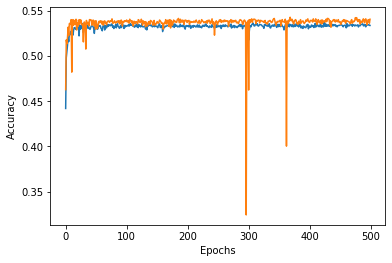

In [59]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [60]:
test_csv=  pd.read_csv(Data_test,sep=";",encoding="utf-8")
display(test_csv)

,Unnamed: 0,id_match,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,NbgoalsHalfTime,NbgoalsFullTime
0,1812,274264,2019-11-04,5601,5530,Portimonense SC,CD Santa Clara,0.0,1,0,...,0.666667,0.555556,0.444444,0.333333,1.555556,0.777778,0.888889,0.555556,1,2
1,1813,274272,2019-11-08,5544,5533,CD Aves,Gil Vicente FC,2.0,1,2,...,1.100000,0.700000,0.800000,0.100000,2.400000,1.100000,1.000000,0.600000,3,3
2,1814,274268,2019-11-09,496,5620,Rio Ave FC,Vitória FC,1.0,1,0,...,1.400000,0.300000,0.600000,0.100000,1.300000,0.600000,0.700000,0.300000,1,1
3,1815,274271,2019-11-09,5530,1903,CD Santa Clara,Sport Lisboa e Benfica,2.0,1,0,...,0.600000,2.000000,0.300000,0.571429,0.571429,0.857143,0.428571,0.285714,1,3
4,1816,274273,2019-11-09,5531,583,FC Famalicão,Moreirense FC,0.0,2,0,...,2.000000,1.000000,0.400000,0.500000,1.300000,1.200000,0.400000,0.200000,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1971,274427,2020-06-24,1049,507,CD Tondela,FC Paços de Ferreira,2.0,0,2,...,0.814815,0.851852,0.407407,0.296296,1.185185,1.407407,0.703704,0.555556,2,4
160,1972,274422,2020-06-24,583,5531,Moreirense FC,FC Famalicão,0.0,0,0,...,1.333333,1.592593,0.518519,0.518519,1.259259,1.555556,0.592593,0.481481,0,2
161,1973,274420,2020-06-25,5613,5543,Sporting Clube de Braga,Vitória SC,1.0,2,2,...,1.592593,1.629630,0.740741,0.629630,1.111111,1.074074,0.370370,0.629630,4,5
162,1974,274425,2020-06-26,5568,498,Os Belenenses Futebol,Sporting Clube de Portugal,2.0,1,3,...,0.851852,1.555556,0.555556,0.814815,1.518519,1.037037,0.592593,0.407407,4,4


In [61]:
test_columns={'win_cons_home':test_csv.win_cons_home,'win_cons_away':test_csv.win_cons_away,'lose_cons_home':test_csv.lose_cons_home,'lose_cons_away':test_csv.lose_cons_away,'puissance_HomeTeam':test_csv.puissance_HomeTeam,'puissance_AwayTeam':test_csv.puissance_AwayTeam}
df = pd.DataFrame(test_columns)
x_test = df.values
x_test

array([[   0,    0,    1,    0, 1067, 3175],
       [   0,    1,    8,    0, 1159, 1346],
       [   0,    1,    1,    0,  100, 3593],
       [   0,    0,    0,    1, 3175, 6562],
       [   0,    0,    0,    0, 2300, 1842],
       [   0,    0,    1,    0, 1672, 1067],
       [   0,    1,    2,    0, 1215, 1729],
       [   0,    1,    1,    0, 5314, 1589],
       [   0,    0,    0,    0, 3593, 5314],
       [   0,    1,    1,    0, 2325, 6206],
       [   0,    0,    1,    2, 3175, 2325],
       [   0,    0,    0,    9, 1842, 1159],
       [   0,    0,    0,    0, 6562, 1672],
       [   0,    0,    0,    0, 1067, 2300],
       [   0,    0,    1,    1, 1729, 1589],
       [   0,    0,    1,    1, 3593, 3593],
       [   2,    1,    0,    0, 1346, 5314],
       [   1,    1,    0,    0, 5314,  100],
       [   2,    1,    0,    0, 6206, 1215],
       [   1,    1,    0,    0, 2325, 6562],
       [   0,    0,    1,    2, 1672, 3175],
       [   0,    0,    1,    2, 2300, 1729],
       [  

In [62]:
y_test = test_csv['score'].values
y_test[58]

1.0

In [63]:
print(test_csv.shape)
print(train_csv.shape)

(164, 38)
(11364, 21)


In [64]:
predictions = model.predict((x_test, y_test))

In [65]:
print(x_test[1])
print(y_test[1])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[1])
np.argmax(predictions[1])

[   0    1    8    0 1159 1346]
2.0
[2.9340717e-01 4.1638032e-01 2.9021239e-01 2.2034012e-08 3.0457176e-08
 9.0484214e-08]


1

# Prédiction Unique

In [66]:
unique = test_csv.values
results = []
equal = []
victory = []
loss = []
i = 0
unique.shape
cpt = 0

In [67]:
for i in unique:
    puissance_homeTeam = i[26]
    puissance_awayTeam = i[27]
    win_cons_home = i[14]
    win_cons_away = i[15]
    lose_cons_home = i[16]
    lose_cons_away= i[17]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    egalite = predictions1[0][0]*100
    victoire = predictions1[0][1]*100
    perte = predictions1[0][2]*100
    result = np.argmax(predictions1)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(result,egalite,victoire,perte,puissance_homeTeam,puissance_awayTeam,cpt)
    cpt = cpt+1

2 28.383690118789673 31.90339207649231 39.7129088640213 1067 3175 0
1 29.34071719646454 41.638028621673584 29.021236300468445 1159 1346 1
2 28.15663516521454 30.46637773513794 41.376978158950806 100 3593 2
2 27.412149310112 26.903662085533142 45.68418562412262 3175 6562 3
1 28.484800457954407 46.27087116241455 25.244328379631042 2300 1842 4
1 28.10175120830536 47.30478227138519 24.593472480773926 1672 1067 5
1 32.66254961490631 41.4661705493927 25.87127387523651 1215 1729 6
1 21.56343162059784 66.86493754386902 11.57163679599762 5314 1589 7
1 28.861311078071594 36.71148121356964 34.42719876766205 3593 5314 8
2 26.37462615966797 23.310214281082153 50.3151535987854 2325 6206 9
1 27.66815423965454 49.32897984981537 23.00286591053009 3175 2325 10
1 27.95810103416443 48.002198338508606 24.039705097675323 1842 1159 11
1 18.784737586975098 72.71192073822021 8.503341674804688 6562 1672 12
1 28.88467311859131 37.15871870517731 33.95660221576691 1067 2300 13
1 34.22943353652954 41.75702929496765

1 32.49266445636749 43.63979995250702 23.867538571357727 1842 1672 122
1 31.61318004131317 40.83380103111267 27.553021907806396 1589 2300 123
2 28.692913055419922 34.48866605758667 36.81841492652893 1346 3175 124
1 20.632590353488922 68.90816688537598 10.45924499630928 5314 1159 125
2 28.220832347869873 30.847632884979248 40.9315288066864 1215 3593 126
1 32.18057155609131 42.444196343421936 25.375232100486755 1067 1346 127
2 26.35709047317505 23.257552087306976 50.3853440284729 2300 6206 128
2 28.585246205329895 33.4638237953186 37.950918078422546 1672 3593 129
1 18.903948366642 72.47561812400818 8.620435744524002 6562 1729 130
1 28.89133095741272 37.299978733062744 33.80868136882782 3593 5314 131
2 28.600043058395386 33.594414591789246 37.80553340911865 3175 5314 132
1 33.32265019416809 41.84141159057617 24.83593374490738 1159 1589 133
1 28.414708375930786 46.31694257259369 25.26833415031433 2325 1842 134
1 28.926077485084534 38.2124662399292 32.86144435405731 100 1215 135
1 28.944951

In [68]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam


In [69]:
# 'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results

In [70]:
predictions1[0]

array([3.1216866e-01, 4.0583718e-01, 2.8199419e-01, 7.8377536e-09,
       1.0872411e-08, 3.6576402e-08], dtype=float32)

In [71]:
print(len(equal))
print(len(victory))
test_csv.homeTeam.shape

164
164


(164,)

In [72]:
df = {'id_match':test_csv.id_match,'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite': equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}

In [73]:
d = pd.DataFrame(df)

In [74]:
d

,id_match,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,274264,2019-11-04,5601,5530,Portimonense SC,CD Santa Clara,28.383690,31.903392,39.712909,2
1,274272,2019-11-08,5544,5533,CD Aves,Gil Vicente FC,29.340717,41.638029,29.021236,1
2,274268,2019-11-09,496,5620,Rio Ave FC,Vitória FC,28.156635,30.466378,41.376978,2
3,274271,2019-11-09,5530,1903,CD Santa Clara,Sport Lisboa e Benfica,27.412149,26.903662,45.684186,2
4,274273,2019-11-09,5531,583,FC Famalicão,Moreirense FC,28.484800,46.270871,25.244328,1
...,...,...,...,...,...,...,...,...,...,...
159,274427,2020-06-24,1049,507,CD Tondela,FC Paços de Ferreira,28.334460,46.369711,25.295824,1
160,274422,2020-06-24,583,5531,Moreirense FC,FC Famalicão,33.553064,41.968226,24.478710,1
161,274420,2020-06-25,5613,5543,Sporting Clube de Braga,Vitória SC,25.815785,55.948979,18.235241,1
162,274425,2020-06-26,5568,498,Os Belenenses Futebol,Sporting Clube de Portugal,26.418847,23.443982,50.137162,2


In [75]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')